In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('/content/student_performance_dataset (1).csv')
print("First 5 records:")
print(df.head())
print("\nDataset Info:")
print(df.info())


First 5 records:
   Student_ID  Attendance  Study_Hours  Internal_Marks Pass/Fail
0           1          78          3.9              84      Pass
1           2          91          3.6              85      Pass
2           3          68          5.8              46      Fail
3           4          54          5.2              67      Fail
4           5          82          4.7              53      Pass

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      100 non-null    int64  
 1   Attendance      100 non-null    int64  
 2   Study_Hours     100 non-null    float64
 3   Internal_Marks  100 non-null    int64  
 4   Pass/Fail       100 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None


In [17]:
# Convert target to numeric (Pass=1, Fail=0) if needed
df['Pass/Fail'] = df['Pass/Fail'].map({'Pass':1, 'Fail':0})

# Features (inputs) and Target (output)
X = df[['Attendance', 'Study_Hours', 'Internal_Marks']]
y = df['Pass/Fail']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Decision Tree Accuracy: 0.95
Confusion Matrix:
 [[16  0]
 [ 1  3]] 

Random Forest Accuracy: 0.95
Confusion Matrix:
 [[16  0]
 [ 1  3]] 

SVM Accuracy: 0.80
Confusion Matrix:
 [[14  2]
 [ 2  2]] 



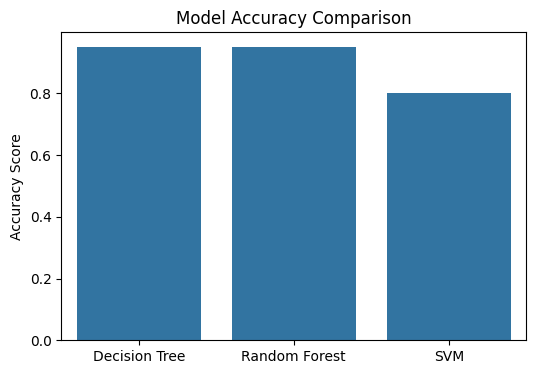

In [19]:
models = {'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm}
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")

# Bar chart comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()


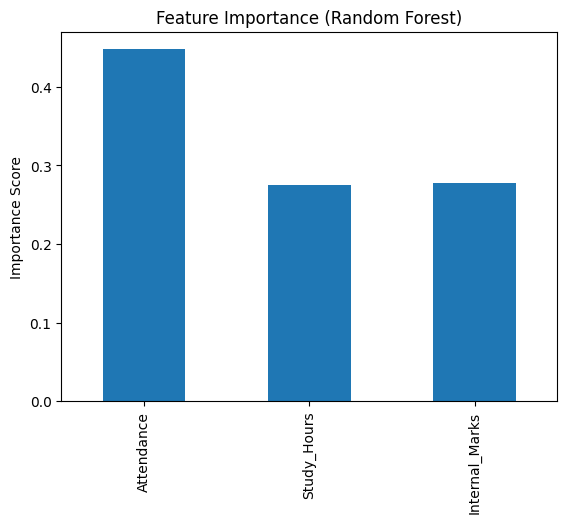

In [20]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.plot(kind='bar', title='Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()
